In [3]:
import numpy as np
import matplotlib.pyplot as plt


lok = 6  # Lock number (-)
mass = 2200  # Rotorcraft mass (kg)
vtip = 200  # Rotor tip speed (m/sec)
rotor_radius= 7.32  # Rotor radius (m)
iy = 10625  # Rotorcraft mass moment of inertia (kgm^2)
h = 1  # Distance from vehicle CG to rotor hub
kbeta = 46000  # Rotor hinge spring hingeless (Nm)
kbeta0 = 0  # Rotor hinge spring teetering (Nm)
omega= vtip / rotor_radius
input_cyc = -1 * np.pi / 180  # Pilot cyclic control (1 deg/sec)
N = 3  # Number of blades

thiy_init = (mass * 9.81 * h + N / 2 * kbeta) / iy
thiy0 = (mass * 9.81 * h +N / 2 * kbeta0) / iy

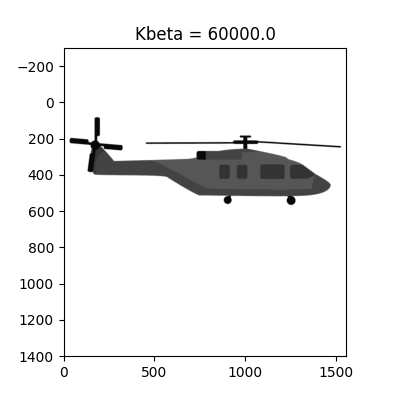

In [46]:
%matplotlib ipympl
from scipy.interpolate import CubicSpline
from scipy.integrate import cumulative_trapezoid
from matplotlib.animation import FuncAnimation
from PIL import Image
import os
import time

# Collects any previous animation which might interfere
try:
    ani.event_source.stop()
except:
    pass

kbeta = 6e4

t_end = 8  # Time (sec)
step = 0.001  # Time step (sec)
t_arr = np.arange(0, t_end, step)
helicopter_img = Image.open(os.path.abspath(os.path.join('.', 'static','helicopter2.png')))
# larger_canvas = Image.new("RGBA", (600, 600), (0, 0, 0, 0))

#------------ Create data ----------------------------------------------------------------
thiy_updated = (mass * 9.81 * h + N / 2 * kbeta) / iy
q = -input_cyc * omega * lok / 16 * (1 - np.exp(-16 / (lok * omega) * thiy_updated * t_arr))
theta = cumulative_trapezoid(q, t_arr, initial=0)
spline = CubicSpline(t_arr, theta)
#----------------------------------------------------------------------------------------------

plt.close()
plt.clf()
plt.cla()
fig, ax = plt.subplots(figsize=(4,4))
plt.title(f"Kbeta = {kbeta}")
plt.ylim(1400,-300)
# ax.imshow(larger_canvas)
img_display = ax.imshow(helicopter_img)  # Create initial image plot

def get_pitch(time):
    return spline(time)


def update(frame):
    pitch_angle = get_pitch(frame)  # Calculate pitch angle
    rotated_img = helicopter_img.rotate(np.degrees(pitch_angle))  # Rotate the image
    img_display.set_data(rotated_img)  # Update the image data
    return (img_display,)  # Return a tuple of the artists that have been updated


time_step = 0.3
frame_interval = 300  # Milliseconds between frames

ani = FuncAnimation(fig, update, frames=np.arange(0, t_end, time_step), interval=frame_interval,blit=True, repeat=False)
plt.show()

